<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/PumpingProblem/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as mpl
%config InlineBackend.figure_formats = ['svg']

## Problem

Water is pumped rapidly from the ocean at high tide to give an increased water level in a tidal power basin of $\Delta=1$m. 

If the tidal range is $R=5$m, show the extra energy gained, as a function of the turbine $\eta_t$ and pump efficiencies $\eta_p$, in comparison with the case without pumping.

In [4]:
Wp, ηp, ρ, g, S, Δ = sp.symbols( "W_p, \eta_p, \rho, g, S, \Delta" ) 
Wp = ρ*g*S*Δ**2 / 2 * ( 1 / ηp )
Wp

S*\Delta**2*g*ho/(2*\eta_p)

In [5]:
Wt, ηt, R = sp.symbols( "W_t, \eta_t, R" ) 
Wt = sp.expand( ρ*g*S*(R+Δ)**2 * ηt) / 2
Wt

R**2*S*\eta_t*g*ho/2 + R*S*\Delta*\eta_t*g*ho + S*\Delta**2*\eta_t*g*ho/2

In [6]:
Wt0 = ρ*g*S*R**2/2 * ηt
Wt0

R**2*S*\eta_t*g*ho/2

In [7]:
G = sp.simplify(sp.cancel((Wt-Wp)/Wt0))
G

1 + 2*\Delta/R + \Delta**2/R**2 - \Delta**2/(R**2*\eta_p*\eta_t)

In [8]:
η = sp.symbols( "\eta" ) 

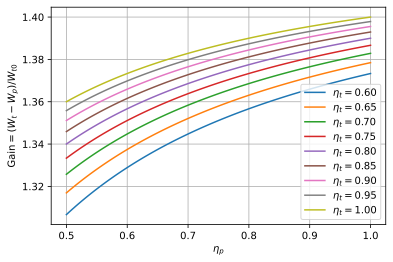

In [9]:
ηt_vals = np.linspace(0.6, 1, 9)

for eta_t in ηt_vals: 
  Gcase = G.subs( ηt, eta_t ).subs( R, 5 ).subs( Δ, 1 )
  lam_g = sp.lambdify( ηp, Gcase )

  ηp_vals = np.linspace(0.5, 1.0, 100)
  g_vals = lam_g(ηp_vals)

  mpl.plot(ηp_vals, g_vals, label = ("$\eta_t=%.2f$" % eta_t) )

mpl.grid()
mpl.legend(loc="lower right")
mpl.xlabel("$η_p$")
mpl.ylabel("$\mathrm{Gain}=(W_t-W_p)/W_{t0}$");